# **Importing the necessary libraries for this notebook**

In [ ]:
# Remove the comment from the line below and run it to install the require packages if your Jupyter kernel does not have these packages installed
# %pip install numpy pandas matplotlib nltk scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
# Downloading required NLTK data files
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Loading and Exploring the datasets**

In [ ]:
train_df = pd.read_csv("/nlp-getting-started/train.csv")
test_df = pd.read_csv("/nlp-getting-started/test.csv")

In [ ]:
train_df.shape

(7613, 5)

In [ ]:
test_df.shape

(3263, 4)

In [ ]:
train_df.head(20)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
train_df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


<Axes: xlabel='target'>

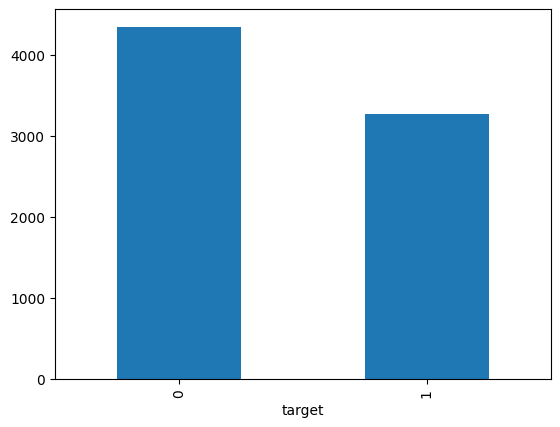

In [ ]:
train_df['target'].value_counts().plot.bar()

In [ ]:
print((train_df.isnull().sum() / len(train_df)) * 100)

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64


In [ ]:
print((train_df[train_df['target'] == 0].isnull().sum() / len(train_df[train_df['target'] == 0])) * 100)

# ~34% of data location is missing
# 0.4% of keyword is missing

id           0.000000
keyword      0.437586
location    33.578996
text         0.000000
target       0.000000
dtype: float64


In [ ]:
print((train_df[train_df['target'] == 1].isnull().sum() / len(train_df[train_df['target'] == 1])) * 100)

# ~33% of data location is missing
# 1.3% of keyword is missing

id           0.000000
keyword      1.284011
location    32.864567
text         0.000000
target       0.000000
dtype: float64


In [ ]:
unique_keywords = train_df['keyword'].unique()
print(unique_keywords)
print('Length: ', len(unique_keywords))

[nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'devastated'
 'devastation' 'disaster' 'displaced' 'droug

In [ ]:
unique_locations = train_df['location'].unique()
print(unique_locations)
print('Length: ', len(unique_locations))

[nan 'Birmingham' 'Est. September 2012 - Bristol' ... 'Vancouver, Canada'
 'London ' 'Lincoln']
Length:  3342


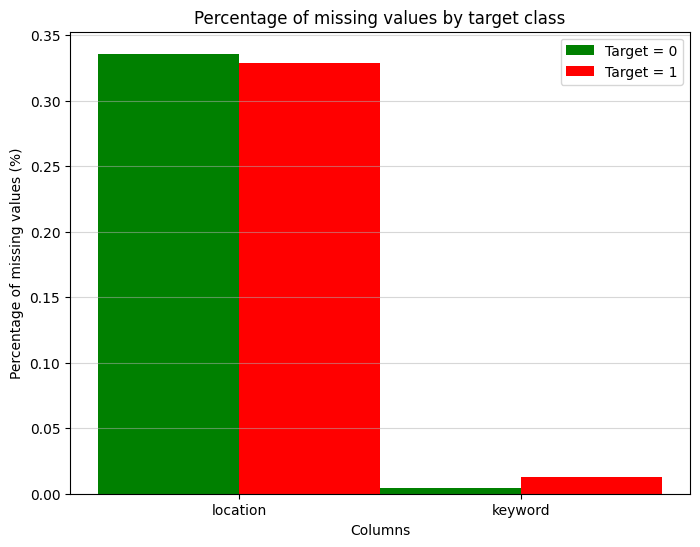

In [ ]:
# Calculating the missing values for target 0
missing_target_0 = (train_df[train_df['target'] == 0].isnull().sum() / len(train_df[train_df['target'] == 0]))
location_missing_0 = missing_target_0['location']
keyword_missing_0 = missing_target_0['keyword']

# Calculating the missing values for target 1
missing_target_1 = (train_df[train_df['target'] == 1].isnull().sum() / len(train_df[train_df['target'] == 1]))
location_missing_1 = missing_target_1['location']
keyword_missing_1 = missing_target_1['keyword']

missing_values = {
    'location': [location_missing_0, location_missing_1],
    'keyword': [keyword_missing_0, keyword_missing_1]
}

# Labels for the x-axis
categories = list(missing_values.keys())

# Values for each target class
target_0 = [missing_values[col][0] for col in categories]
target_1 = [missing_values[col][1] for col in categories]

# Bar width
bar_width = 0.5
x = np.arange(len(categories))

# Making the barplot
plt.figure(figsize=(8, 6))
plt.bar(x - bar_width / 2, target_0, bar_width, color='green', label='Target = 0')
plt.bar(x + bar_width / 2, target_1, bar_width, color='red', label='Target = 1')

# Labels and titles
plt.xlabel('Columns')
plt.ylabel('Percentage of missing values (%)')
plt.title('Percentage of missing values by target class')
plt.xticks(x, categories) # Setting the x-axis labels
plt.legend()
plt.grid(axis='y', linestyle='-', alpha=0.5)

# Showing the plot
plt.show()

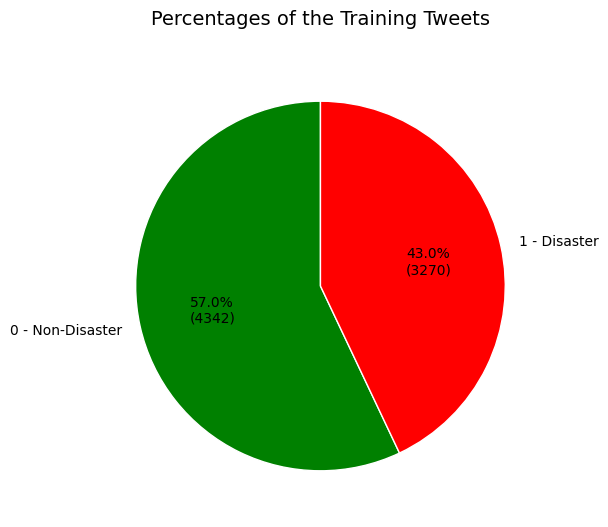

In [ ]:
# Target Distribution Pie Chart
plt.figure(figsize=(8, 6))
train_df['target'].value_counts().plot.pie(
    autopct=lambda p: f'{p:.1f}%\n({int(p/100*len(train_df))})',
    labels=['0 - Non-Disaster', '1 - Disaster'],
    colors=['green', 'red'],
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.title('Percentages of the Training Tweets\n', fontsize=14)
plt.ylabel('')
plt.show()

# **Dropping Unnecessary Columns**

In [ ]:
train_df.drop(columns=['id', 'location'], inplace=True, axis=1)
test_df.drop(columns=['location'], inplace=True)

# **Handling Missing Values**

In [ ]:
train_df.dropna(inplace=True)
test_df.fillna({'keyword': ''}, inplace=True)

In [ ]:
print("Checking null values:")
print(train_df.isna().sum())

print("\nRows and Columns:")
print(train_df.shape)

print("\nChecking null values:")
print(test_df.isna().sum())

print("\nRows and Columns:")
print(test_df.shape)

Checking null values:
keyword    0
text       0
target     0
dtype: int64

Rows and Columns:
(7552, 3)

Checking null values:
id         0
keyword    0
text       0
dtype: int64

Rows and Columns:
(3263, 3)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7552 entries, 31 to 7582
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   keyword  7552 non-null   object
 1   text     7552 non-null   object
 2   target   7552 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 236.0+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3263 non-null   int64 
 1   keyword  3263 non-null   object
 2   text     3263 non-null   object
dtypes: int64(1), object(2)
memory usage: 76.6+ KB


# **Splitting the training data**

In [ ]:
from sklearn.model_selection import train_test_split

X = train_df['text'].values
y = train_df['target'].values

# Splitting the data into training and evaluation sets (70/30 split)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3)

# **Preprocessing the data**

In [ ]:
def text_preprocessing(text):
    # Converting the text to lower case and removing any whitespace.
    text = text.lower().strip()

    # Removing Urls.
    text = re.sub(r'http\S+|www\.\S+', '', text)

    # Removing Twitter handles and hashtags.
    text = re.sub(r'[@#]\w+', '', text)

    # Removing any remaining punctuation.
    text = re.sub(r'[^\w\s]', '', text)

    # Splitting the text into words.
    words = text.split()

    # Lemmatizing the words using nltk.stem WordNetLemmatizer.
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Removing the stop words.
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Join the words back into a sentence.
    return ' '.join(words)

In [ ]:
# Testing the text_preprocessing function
print("Before Preprocessing: ")
print(train_df['text'].iloc[4])

print("After Preprocessing: ")
processed_text = text_preprocessing(train_df['text'].iloc[4])
print(processed_text)

Before Preprocessing: 
On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N
After Preprocessing: 
plus side look sky last night wa ablaze


In [ ]:
X_train = np.array([text_preprocessing(text) for text in X_train])
X_eval = np.array([text_preprocessing(text) for text in X_eval])

# **Bag of Words Model**

In [ ]:
M = 15 # Only include words that appear in at least 15 different tweets.
count_vect = CountVectorizer(binary=True, min_df = M)
X_train = count_vect.fit_transform(X_train)
X_train.shape

(5286, 681)

In [ ]:
# Do the same for the development set.
count_vect_test = CountVectorizer(binary=True, min_df = M)
X_eval = count_vect.transform(X_eval)
X_eval.shape

(2266, 681)

# **Logistic Regression Models**

In [ ]:
from sklearn.metrics import f1_score

# Training a Logistic Regression model without regularization terms.
logreg = LogisticRegression(penalty=None)
logreg.fit(X_train, y_train)

# Training a Logistic Regression model with L1 regularization.
logregL1 = LogisticRegression(penalty='l1', solver='liblinear')
logregL1.fit(X_train, y_train)

# Training a Logistic Regression model with L2 regularization (deafult).
logregL2 = LogisticRegression()
logregL2.fit(X_train, y_train)

# Predictions on the development set.
y_pred = logreg.predict(X_eval)
l1_y_pred = logregL1.predict(X_eval)
l2_y_pred = logregL2.predict(X_eval)

# Predictions on the training set.
y_train_pred = logreg.predict(X_train)
l1_y_train_pred = logregL1.predict(X_train)
l2_y_train_pred = logregL2.predict(X_train)

# Verifying the F1 score for the training set of the three models.
print("Training set F-1 scores")
print("Logistic Regression (No regularization) score: ", f1_score(y_train, y_train_pred))
print("Logistic Regression (L1 regularization) score: ", f1_score(y_train, l1_y_train_pred))
print("Logistic Regression (L2 regularization) score: ", f1_score(y_train, l2_y_train_pred))

# Verifying the F1 score for the development set of the three models.
print("\nDevelopment set F-1 scores")
print("Logistic Regression (No regularization) score: ", f1_score(y_eval, y_pred))
print("Logistic Regression (L1 regularization) score: ", f1_score(y_eval, l1_y_pred))
print("Logistic Regression (L2 regularization) score: ", f1_score(y_eval, l2_y_pred))

Training set F-1 scores
Logistic Regression (No regularization) score:  0.7958897711349836
Logistic Regression (L1 regularization) score:  0.7798319327731092
Logistic Regression (L2 regularization) score:  0.7875327147275756

Development set F-1 scores
Logistic Regression (No regularization) score:  0.7120304844855743
Logistic Regression (L1 regularization) score:  0.7086882453151618
Logistic Regression (L2 regularization) score:  0.7217877094972067


In [ ]:
# Printing the weight vectors of the trained model
coefs = logregL1.coef_
print(coefs)

[[-4.12133092e-01  0.00000000e+00  0.00000000e+00 -5.58036856e-01
   0.00000000e+00  0.00000000e+00  6.51703409e-01  1.28221788e+00
   0.00000000e+00  0.00000000e+00  1.07066387e+00  4.15664379e-01
   7.85518025e-01  1.16512390e-01  2.59268652e-03  0.00000000e+00
   1.57994543e-01  2.08304379e-02  9.51377154e-01  2.02766543e+00
   0.00000000e+00  6.11883555e-02  0.00000000e+00 -5.90693131e-01
  -4.05318251e-01  0.00000000e+00 -3.81673802e-01  1.24850548e+00
   6.52696039e-01 -3.46868705e-02  0.00000000e+00  0.00000000e+00
   2.13045712e-01  4.99466189e-01  0.00000000e+00  8.64933380e-01
   0.00000000e+00 -1.22630784e+00  6.03541740e-01 -1.16938139e+00
   4.89293089e-02 -3.97347705e-01  3.02670404e-01  1.66928971e+00
   8.62997136e-01  0.00000000e+00  1.39961946e+00 -2.21198199e-01
  -6.55097238e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -2.48093097e+00 -3.23310141e-01 -6.72210185e-01
   0.00000000e+00  0.00000000e+00 -6.31659651e-01  0.00000000e+00
   0.00000

In [ ]:
coefs = coefs[0]
feature_names = count_vect.get_feature_names_out()

# Creating a Dataframe to inspect the importance of the words
df_coefs = pd.DataFrame({
    'word': feature_names,
    'coefficient': coefs
})

# Compute the absolute coefficients to sort by importance.
df_coefs['abs_coefficient'] = np.abs(df_coefs['coefficient'])
df_coefs = df_coefs.sort_values(by='abs_coefficient', ascending=False)

# Printing the 20 most important words for deciding whether a tweet is about a disaster or not.
print("Top 20 most important words: ")
print(df_coefs.head(20))

Top 20 most important words: 
             word  coefficient  abs_coefficient
617       typhoon     4.024950         4.024950
376       migrant     3.860596         3.860596
311       israeli     3.163810         3.163810
164    derailment     3.029032         3.029032
83        bombing     2.831707         2.831707
156        debris     2.696928         2.696928
82         bomber     2.665434         2.665434
284     hiroshima     2.541762         2.541762
53            bag    -2.480931         2.480931
190    earthquake     2.400376         2.400376
184       drought     2.336825         2.336825
335   legionnaire     2.335903         2.335903
637       warning     2.300776         2.300776
140          crew     2.243739         2.243739
319        killed     2.242317         2.242317
289      horrible     2.234758         2.234758
368      massacre     2.202848         2.202848
192          ebay    -2.187166         2.187166
308  investigator     2.102403         2.102403
19        

In [ ]:
# Separating the words to see which contribute to each classification the most
disaster_words = df_coefs[df_coefs['coefficient'] > 0].head(20).reset_index(drop=True)
non_disaster_words = df_coefs[df_coefs['coefficient'] < 0].head(20).reset_index(drop=True)

# Concatenating the two word lists and dropping the abs_coefficient columns
side_by_side = pd.concat([
    disaster_words.drop(columns=['abs_coefficient']),
    non_disaster_words.drop(columns=['abs_coefficient'])
], axis=1, keys=['Disaster', 'Non-Disaster'])

# Printing the 20 most important words for each classification.
print(side_by_side)

        Disaster             Non-Disaster            
            word coefficient         word coefficient
0        typhoon    4.024950          bag   -2.480931
1        migrant    3.860596         ebay   -2.187166
2        israeli    3.163810       better   -1.751527
3     derailment    3.029032       trying   -1.640478
4        bombing    2.831707         blew   -1.587993
5         debris    2.696928        whats   -1.586362
6         bomber    2.665434        phone   -1.477094
7      hiroshima    2.541762        start   -1.457712
8     earthquake    2.400376         play   -1.448061
9        drought    2.336825         love   -1.370611
10   legionnaire    2.335903      blazing   -1.366194
11       warning    2.300776         word   -1.349981
12          crew    2.243739          yet   -1.295607
13        killed    2.242317         sure   -1.242981
14      horrible    2.234758      appears   -1.226308
15      massacre    2.202848      explode   -1.205283
16  investigator    2.102403

# **Bernoulli Naive Bayes Model**

In [ ]:
# Selecting the training values to split
X = train_df['text'].values
y = train_df['target'].values

# Splitting the data into training and evaluation sets (70/30 split)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3)

M = 15 # Only include words that appear in at least 10 different tweets.

# Vectorize the training set for the model
count_vect = CountVectorizer(binary=True, min_df=M)
X_train = count_vect.fit_transform(X_train).toarray()
X_eval = count_vect.transform(X_eval).toarray()

In [ ]:
X_train.shape

(5286, 807)

In [ ]:
X_eval.shape

(2266, 807)

In [ ]:
# Let's compute the maximum likelihood parameters of the training dataset.
K = 2 # Number of clases.

def compute_maxlikeparams(X, y):
  n = X.shape[0] # Size of the dataset.
  d = X.shape[1] # Number of features in the dataset.

  # These are the shapes of the parameters.
  psis = np.zeros([K, d])
  phis = np.zeros([K])

  # We now compute the parameters.
  for k in range(K):
    X_k = X[y == k]
    # Using Laplace Smoothing: adding 1 to numerator and 2 to denominator.
    psis[k] = (np.mean(X_k, axis=0) + 1) / (X_k.shape[0] + 2)
    phis[k] = X_k.shape[0] / float(n)

  return psis, phis

psis, phis = compute_maxlikeparams(X_train, y_train)
# Print out the class proportions.
print(phis)

[0.57472569 0.42527431]


In [ ]:
# Now compute the predictions based on Bayes' rule.
def naive_bayes_predict(x, psis, phis):
  """
  Returns the class assignments and scores under the Naive Bayes model.

  Computes argmax_y P(y|x) as argmax_y P(x|y)P(y).
  """
  # Adjust the shapes.
  n, d = x.shape
  x = np.reshape(x, (1, n, d))
  psis = np.reshape(psis, (K, 1, d))

  psis = psis.clip(1e-14, 1 - 1e-14) # Clip the probabilities to avoid log(0).

  # Compute log-probabilities.
  logpy = np.log(phis).reshape([K, 1])
  logpxy = x * np.log(psis) + (1 - x) * np.log(1 - psis)
  logpyx = logpxy.sum(axis=2) + logpy

  return logpyx.argmax(axis=0).flatten()

y_pred = naive_bayes_predict(X_eval, psis, phis)
print(y_pred[:20])

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
# Verifying the F1 score for the predictions of the model
print("Bernoulli Naive Bayes F1-score: ", f1_score(y_eval, y_pred))

Bernoulli Naive Bayes F1-score:  0.6069651741293532


# **N-gram Models**

In [ ]:
# Selecting the training values to split
X = train_df['text'].values
y = train_df['target'].values

# Splitting the data into training and evaluation sets (70/30 split)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3)

M = 15 # Only include n-grams that appear in at least 15 different tweets.
count_vect_ngram = CountVectorizer(binary=True, ngram_range=(1, 2), min_df = M)
X_train_ngram = count_vect_ngram.fit_transform(X_train).toarray()
X_eval_ngram = count_vect_ngram.transform(X_eval).toarray()

In [ ]:
# Getting the vocabulary tokens.
vocab = count_vect_ngram.get_feature_names_out()

# Count the unigrams and bigrams.
unigrams = [token for token in vocab if ' ' not in token]
bigrams = [token for token in vocab if ' ' in token]

print("Total number of vocabulary tokens:", len(vocab))
print("Number of 1-grams:", len(unigrams))
print("Number of 2-grams:", len(bigrams))

# Printing 10 samples of 2-grams from the vocabulary
print("Sample 10 2-grams:", bigrams[:10])

Total number of vocabulary tokens: 1033
Number of 1-grams: 804
Number of 2-grams: 229
Sample 10 2-grams: ['16yr old', '2015 http', '40 families', '70 years', 'about the', 'affected by', 'after the', 'airport get', 'all the', 'and it']


In [ ]:
# Implementing a Logistic regression model to train on 2-grams.
logreg_ngram = LogisticRegression() # Using default L2 regulariztion.
logreg_ngram.fit(X_train_ngram, y_train)

# Predictions on the training set.
y_pred_ngram_train = logreg_ngram.predict(X_train_ngram)

# Predictions and evaluations using the evaluation set.
y_pred_ngram_test = logreg_ngram.predict(X_eval_ngram)

# Verifying the F1 score for the training and test sets.
print("Logistic Regression (N-gram) F-1 Score:", f1_score(y_train, y_pred_ngram_train))
print("Logistic Regression (N-gram) F-1 Score:", f1_score(y_eval, y_pred_ngram_test))

Logistic Regression (N-gram) F-1 Score: 0.8243494423791822
Logistic Regression (N-gram) F-1 Score: 0.7434320849636669


In [ ]:
# Implementing a Bernoulli Naive Bayes classifier Model.

# Calculating the parameters for Bernoulli Naive Bayes on n-gram features.
psis, phis = compute_maxlikeparams(X_train_ngram, y_train)

# Predictions on the training set.
y_pred_nb_train = naive_bayes_predict(X_train_ngram, psis, phis)

# Predictions on the evaluation set.
y_pred_nb_test = naive_bayes_predict(X_eval_ngram, psis, phis)

# Verifying the F1 score for the training and evaluation sets.
print("Bernoulli Naive Bayes (N-gram) F-1 score:", f1_score(y_train, y_pred_nb_train))
print("Bernoulli Naive Bayes (N-gram) F-1 score:", f1_score(y_eval, y_pred_nb_test))

Bernoulli Naive Bayes (N-gram) F-1 score: 0.604812834224599
Bernoulli Naive Bayes (N-gram) F-1 score: 0.5940345368916797


# **Final Model Training and Submission**

In [ ]:
# Load the data set once again
train_df = pd.read_csv("/nlp-getting-started/train.csv")
test_df = pd.read_csv("/nlp-getting-started/test.csv")

In [ ]:
# Preprocess the text columns for both the training and test data.
train_df['text'] = train_df['text'].apply(text_preprocessing)
test_df['text'] = test_df['text'].apply(text_preprocessing)

In [ ]:
# Create a holdout set for evaluating the model from the full training set
X = train_df['text'].values
y = train_df['target'].values

# Splitting the data into training and evaluation sets (80/20 split)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2)

# Vectorize the tetx using an N-gram model
M = 15
count_vect = CountVectorizer(binary=True, ngram_range=(1, 2), min_df = M)

In [ ]:
# Fit the vectorizer on the training subset and transform both training and evaluation texts.
X_train = count_vect_ngram.fit_transform(X_train).toarray()
X_eval = count_vect_ngram.transform(X_eval).toarray()

In [ ]:
# Train the Logistic regression model with L2 regularization.
logreg = LogisticRegression(penalty='l2', solver='liblinear') # Using default L2 regulariztion.
logreg.fit(X_train, y_train)

# Get predictions on the training and evaluation set.
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_eval)

# Calculate and print the F1 scores for the training and test sets.
print("Final Model (Holdout) Training F-1 Score:", f1_score(y_train, y_pred_train))
print("Final Model (Holdout) Evaluation F-1 Score:", f1_score(y_eval, y_pred_test))

Final Model (Holdout) Training F-1 Score: 0.7907166123778502
Final Model (Holdout) Evaluation F-1 Score: 0.7315875613747954


In [ ]:
# Reinitialize and re-fit the vectorizer on the entire training data.
vectorizer_full = CountVectorizer(binary=True, ngram_range=(1, 2), min_df = M)
X_full_vect = vectorizer_full.fit_transform(X)

# Train the final model on the full training data.
final_model = LogisticRegression(penalty='l2', solver='liblinear')
final_model.fit(X_full_vect, y)

# Transform the test set using the same vectorizer.
X_test = test_df['text'].values
X_test_vect = vectorizer_full.transform(X_test)

# Make the predictions on the test set.
y_pred = final_model.predict(X_test_vect)

In [ ]:
# Create the Kaggle submission. Only include the 'id' and 'target' columns.
submission = pd.DataFrame({
    'id': test_df['id'],
    'target': y_pred
})

submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")

Submission file created: submission.csv
